Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection & Analysis

In [2]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('/content/parkinsons.csv')

In [3]:
# printing the first 10 rows of the dataframe
parkinsons_data.head(10)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   
5  phon_R01_S01_6      120.552       131.162       113.787         0.00968   
6  phon_R01_S02_1      120.267       137.244       114.820         0.00333   
7  phon_R01_S02_2      107.332       113.840       104.315         0.00290   
8  phon_R01_S02_3       95.730       132.068        91.754         0.00551   
9  phon_R01_S02_4       95.056       120.103        91.226         0.00532   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   
5           0.00008   0.00463   0.00750     0.01388       0.04701  ...   
6           0.00003   0.00155   0.00202     0.00466       0.01608  ...   
7           0.00003   0.00144   0.00182     0.00431       0.01567  ...   
8           0.00006   0.00293   0.00332     0.00880       0.02093  ...   
9           0.00006   0.00268   0.00332     0.00803       0.02838  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
5      0.06985  0.01222  21.378       1  0.415564  0.825069 -4.242867   
6      0.02337  0.00607  24.886       1  0.596040  0.764112 -5.634322   
7      0.02487  0.00344  26.892       1  0.637420  0.763262 -6.167603   
8      0.03218  0.01070  21.812       1  0.615551  0.773587 -5.498678   
9      0.04324  0.01022  21.862       1  0.547037  0.798463 -5.011879   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  
5  0.299111  2.187560  0.357775  
6  0.257682  1.854785  0.211756  
7  0.183721  2.064693  0.163755  
8  0.327769  2.322511  0.231571  
9  0.325996  2.432792  0.271362  

[10 rows x 24 columns]

In [4]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(195, 24)

In [5]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
# getting some statistical measures about the data
parkinsons_data.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR      status  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   21.885974    0.753846   
std            0.194877  ...     0.030459    0.040418    4.425764    0.431878   
min            0.085000  ...     0.013640    0.000650    8.441000    0.000000   
25%            0.148500  ...     0.024735    0.005925   19.198000    1.000000   
50%            0.221000  ...     0.038360    0.011660   22.085000    1.000000   
75%            0.350000  ...     0.060795    0.025640   25.075500    1.000000   
max            1.302000  ...     0.169420    0.314820   33.047000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

In [8]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

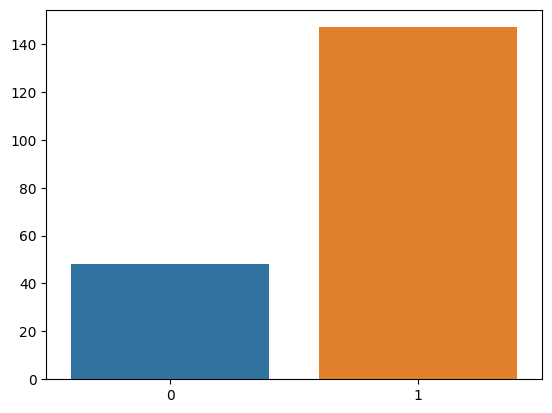

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=parkinsons_data['status'].value_counts().index, y=parkinsons_data['status'].value_counts().values)
plt.show()

NHR  Mean - Median =  0.0131
NHR  3 Standard Deviation below mean  -0.0965
NHR  3 Standard Deviation above mean  0.1461


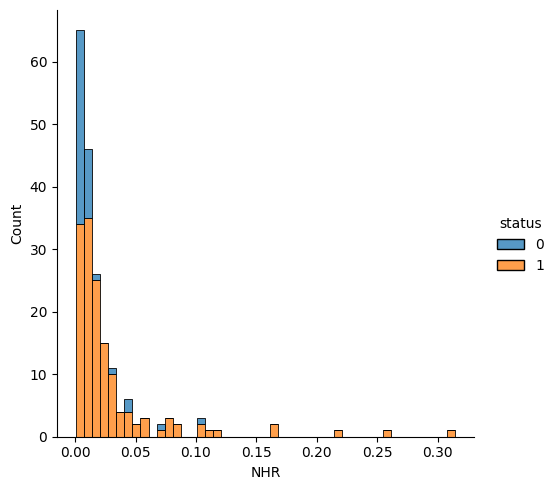

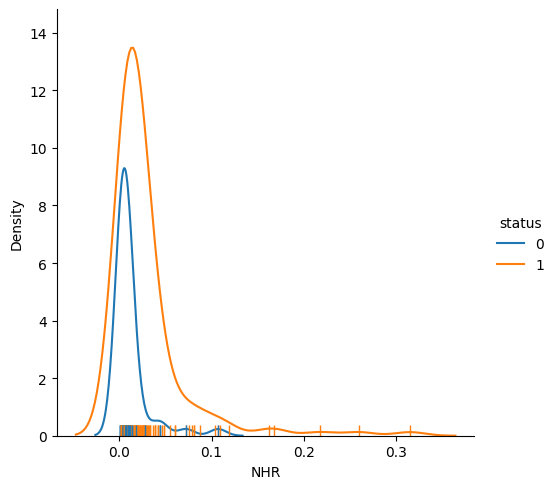

In [10]:
feature = 'NHR'
mean_minus_median = np.round(parkinsons_data[feature].mean(),4)  -  np.round((parkinsons_data[feature].median()),4)
print(feature," Mean - Median = ",np.round(mean_minus_median,4))
minus3std = np.round(parkinsons_data[feature].mean(),4)  -  np.round((3*parkinsons_data[feature].std()),4)
print(feature," 3 Standard Deviation below mean ",np.round(minus3std,4))
plus3std = np.round(parkinsons_data[feature].mean(),4) + np.round((3*parkinsons_data[feature].std()),4)
print(feature," 3 Standard Deviation above mean ",np.round(plus3std,4))
sns.displot(data=parkinsons_data, x=feature, hue="status", kind="hist",multiple="stack")
plt.show()
sns.displot(data=parkinsons_data, x=feature, hue="status", kind="kde",rug=True)
plt.show()

HNR  Mean - Median =  -0.199
HNR  3 Standard Deviation below mean  8.6087
HNR  3 Standard Deviation above mean  35.1633


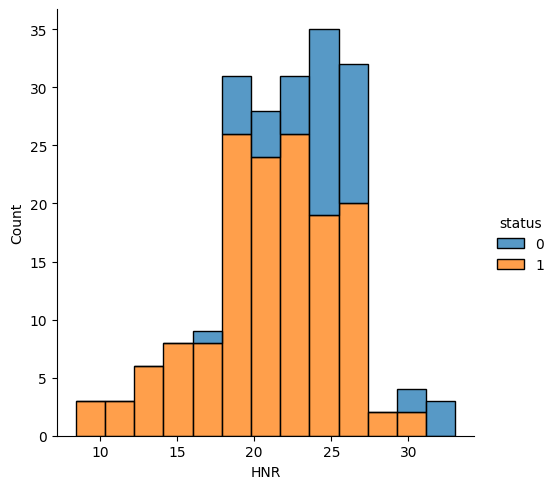

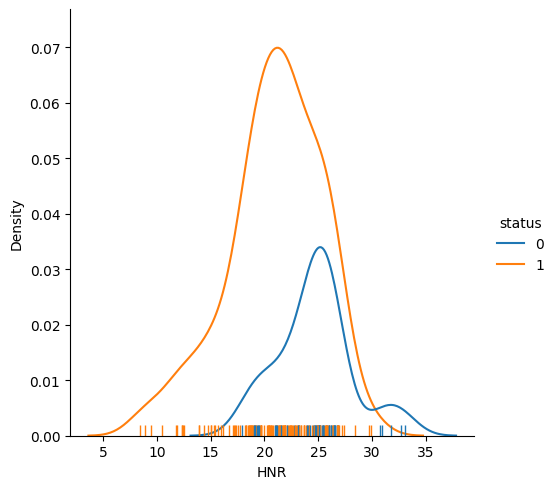

In [11]:
feature = 'HNR'
mean_minus_median = np.round(parkinsons_data[feature].mean(),4)  -  np.round((parkinsons_data[feature].median()),4)
print(feature," Mean - Median = ",np.round(mean_minus_median,4))
minus3std = np.round(parkinsons_data[feature].mean(),4)  -  np.round((3*parkinsons_data[feature].std()),4)
print(feature," 3 Standard Deviation below mean ",np.round(minus3std,4))
plus3std = np.round(parkinsons_data[feature].mean(),4) + np.round((3*parkinsons_data[feature].std()),4)
print(feature," 3 Standard Deviation above mean ",np.round(plus3std,4))
sns.displot(data=parkinsons_data, x=feature, hue="status", kind="hist",multiple="stack")
plt.show()
sns.displot(data=parkinsons_data, x=feature, hue="status", kind="kde",rug=True)
plt.show()

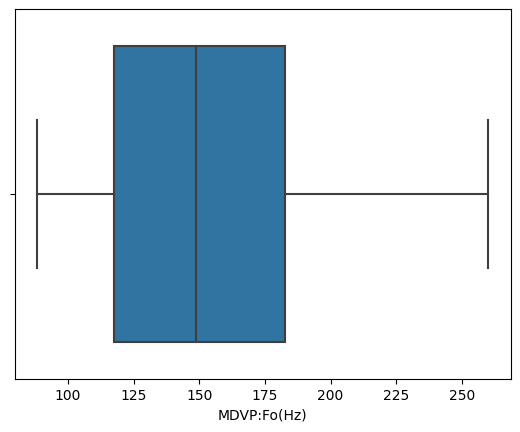

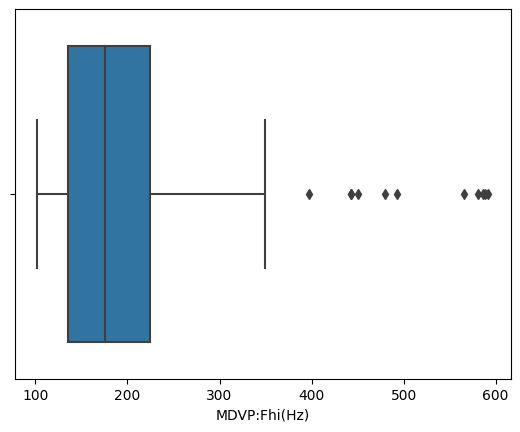

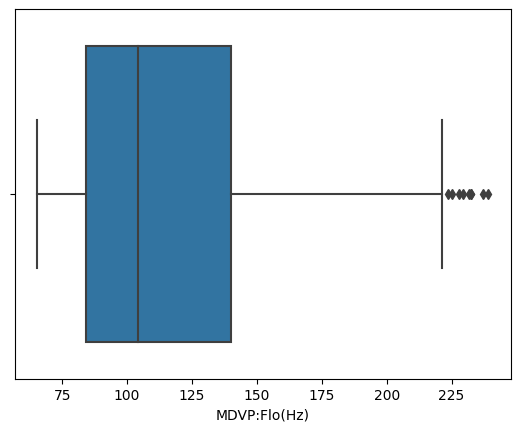

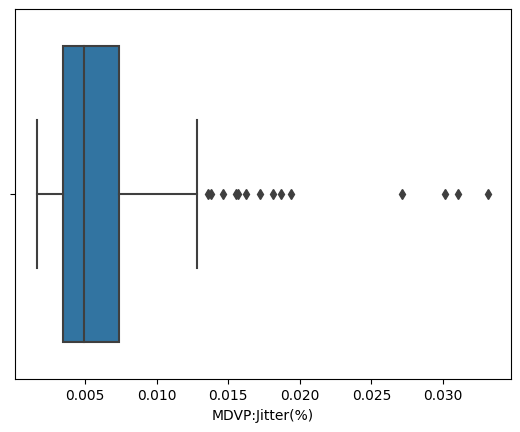

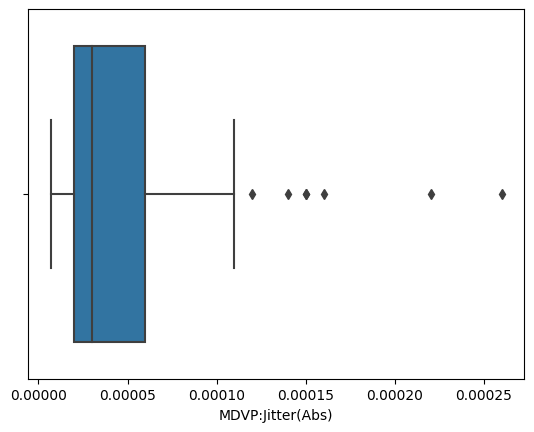

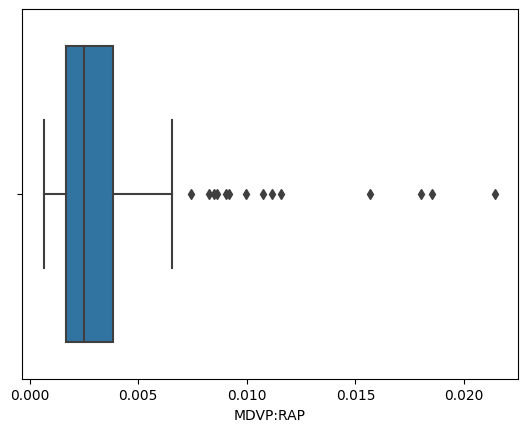

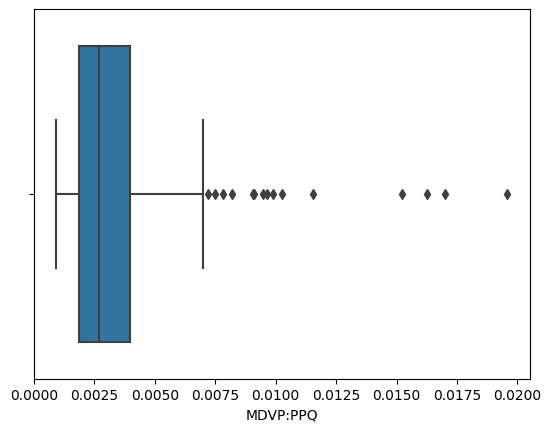

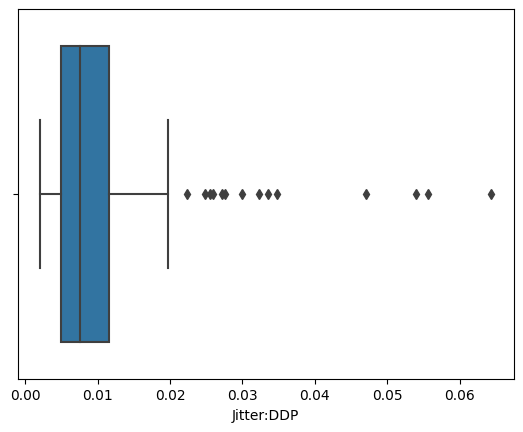

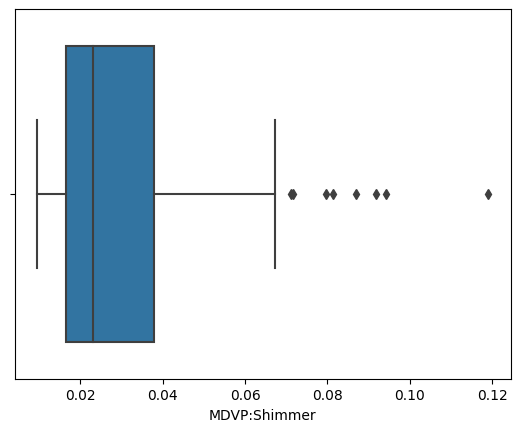

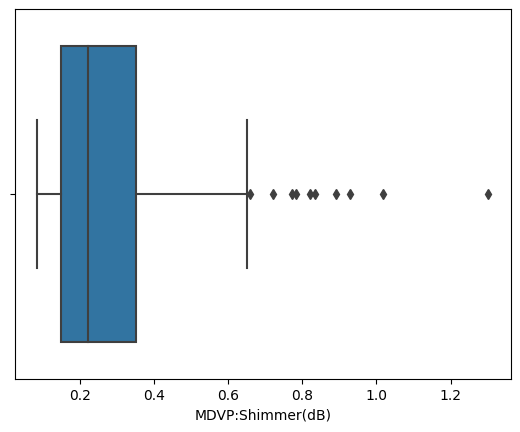

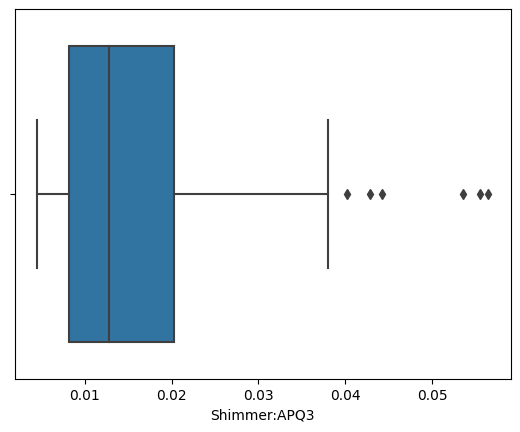

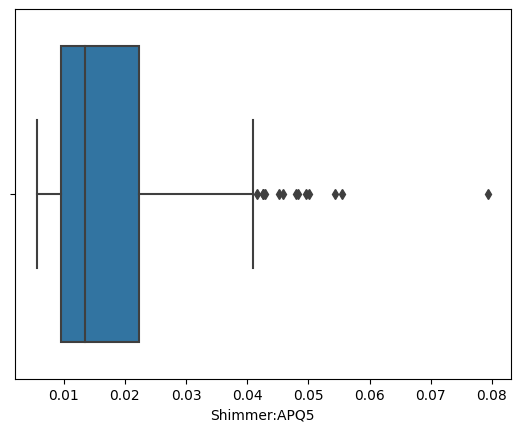

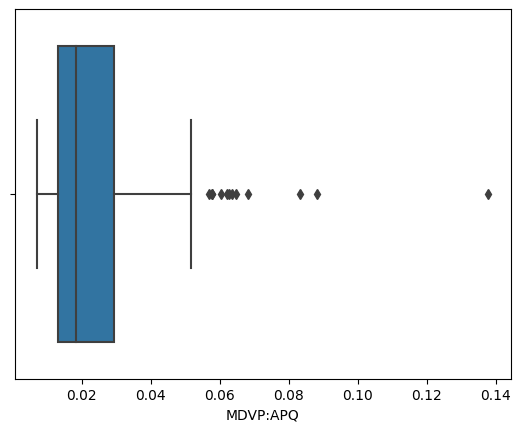

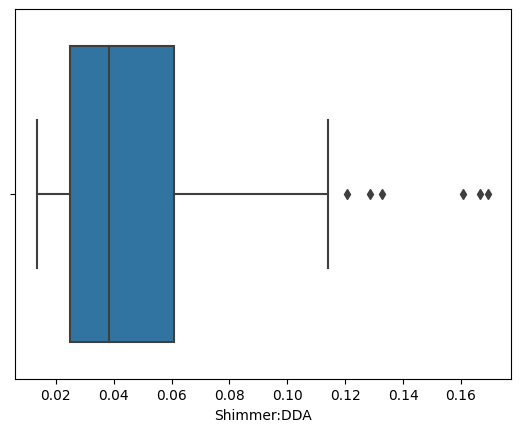

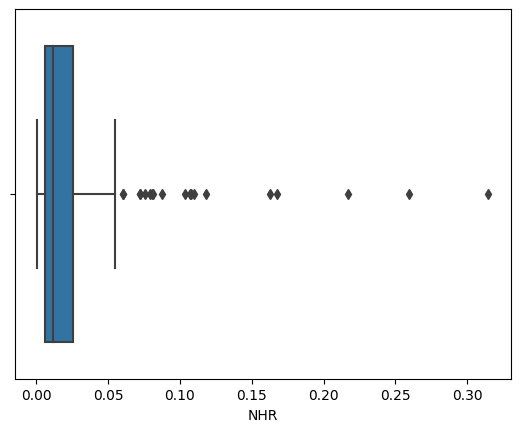

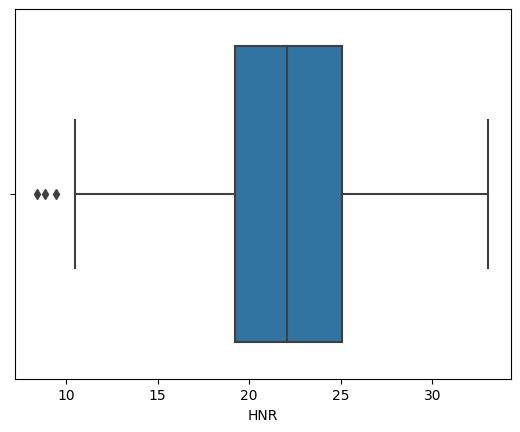

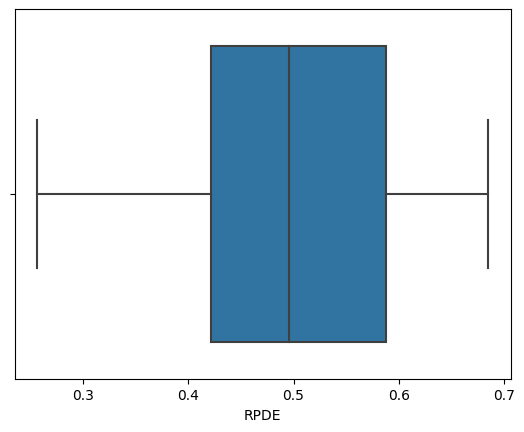

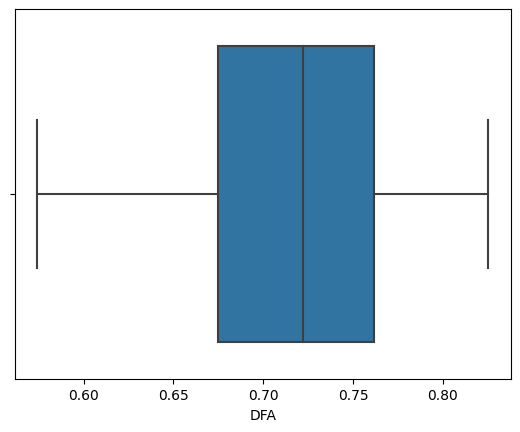

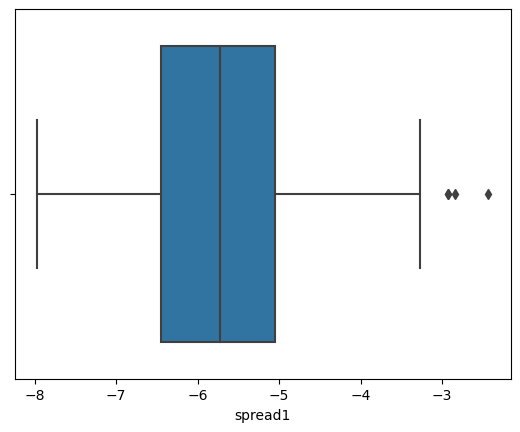

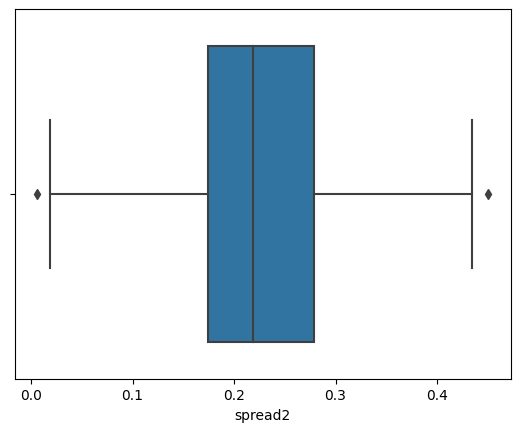

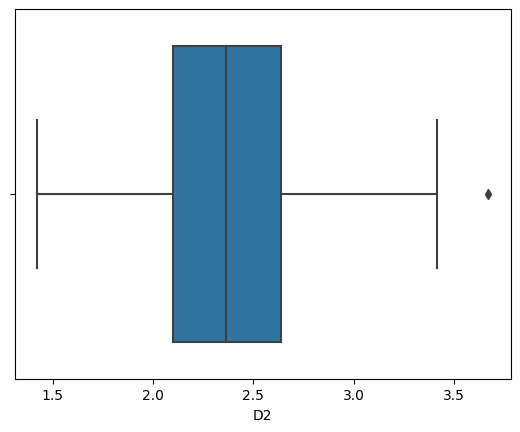

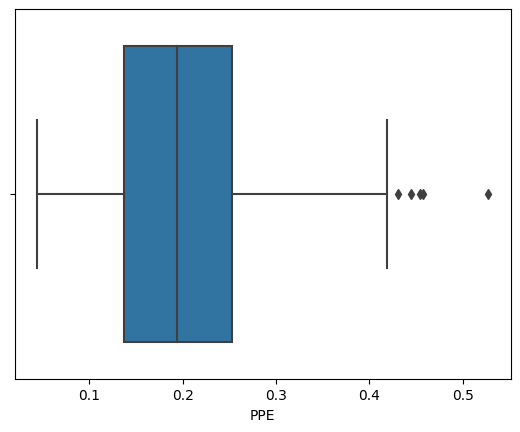

In [12]:
#Analysis for outlier using boxplot
for feature in parkinsons_data.columns:
    if(feature not in ['name','status']):
        sns.boxplot(x=feature,hue='status',data=parkinsons_data)
        plt.show()

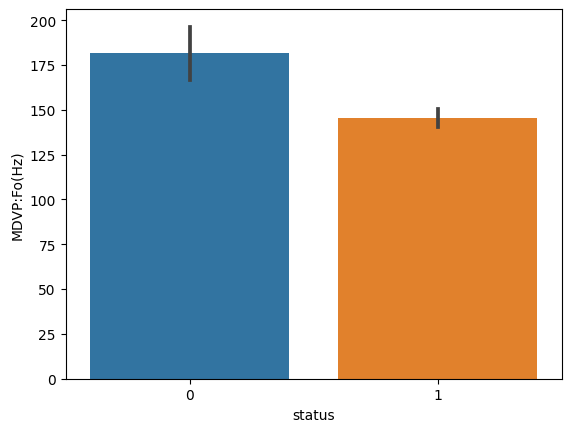

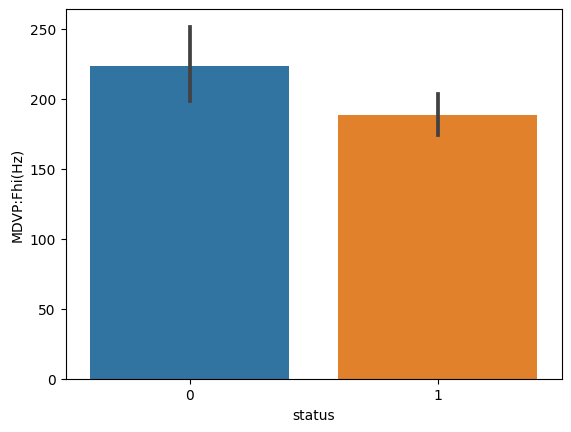

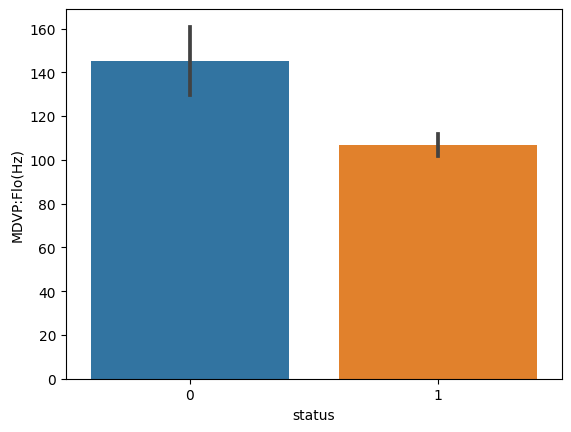

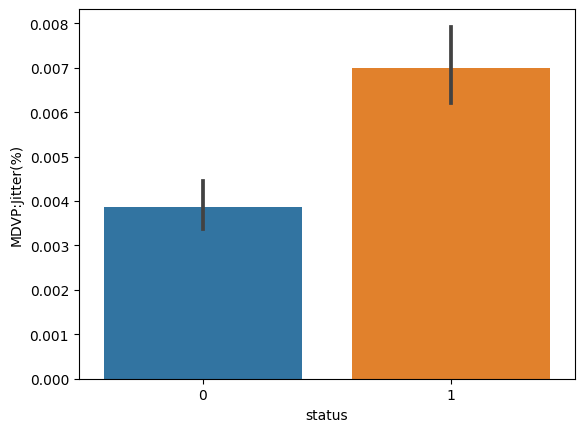

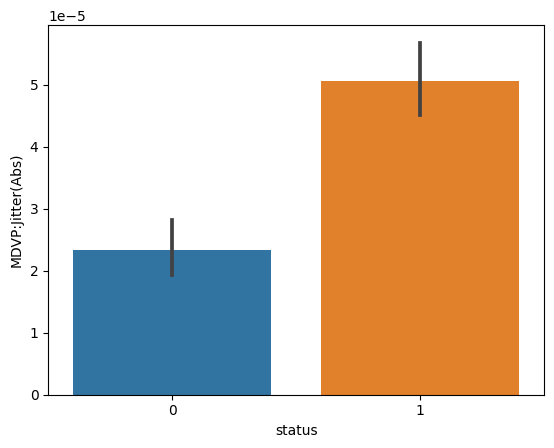

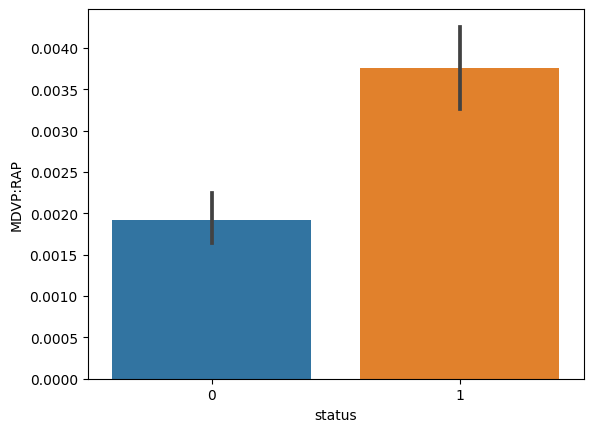

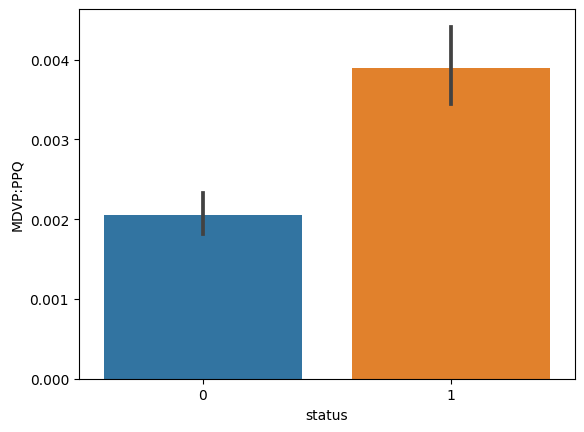

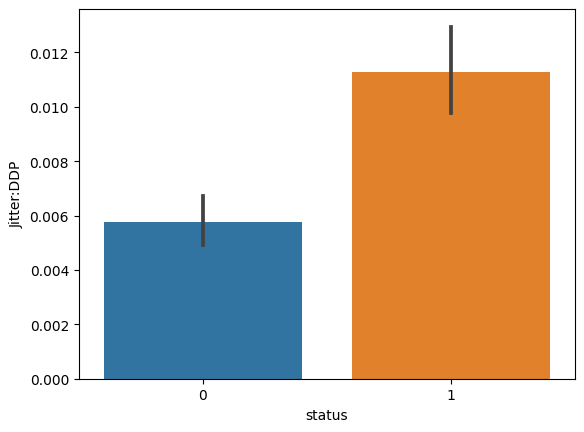

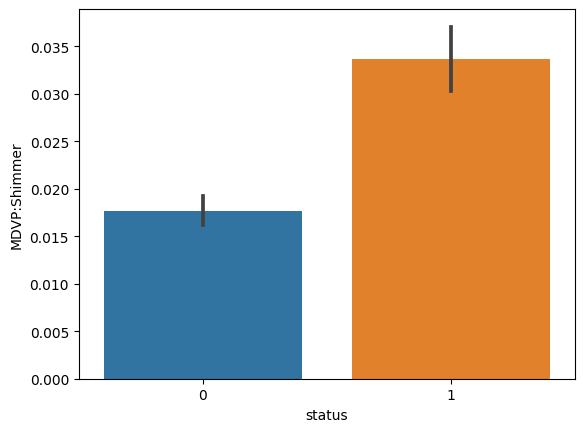

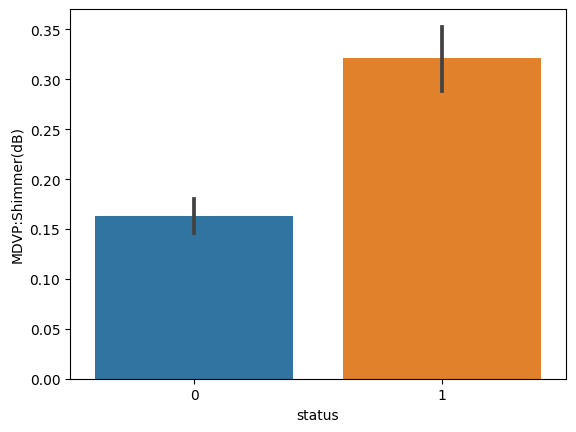

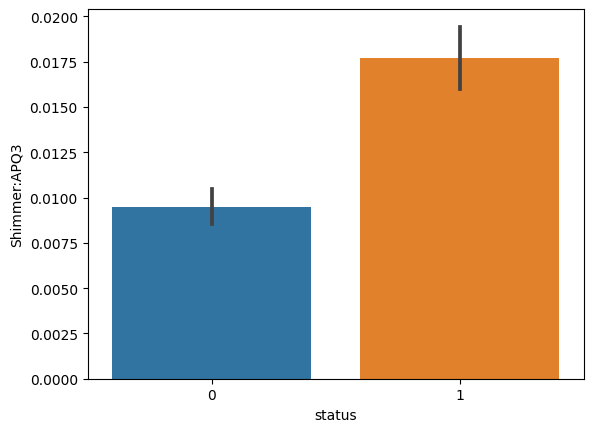

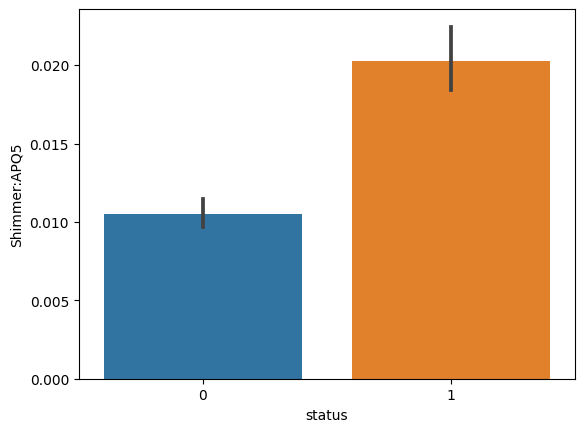

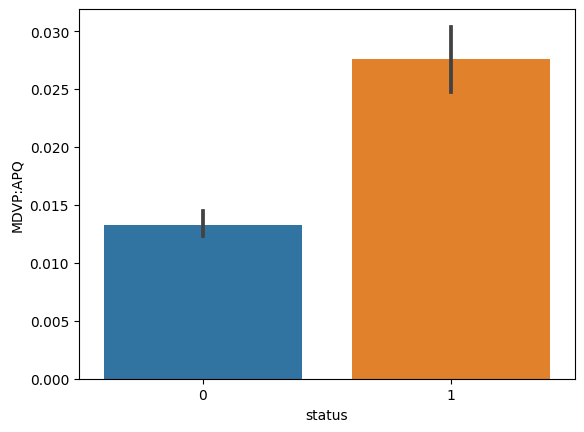

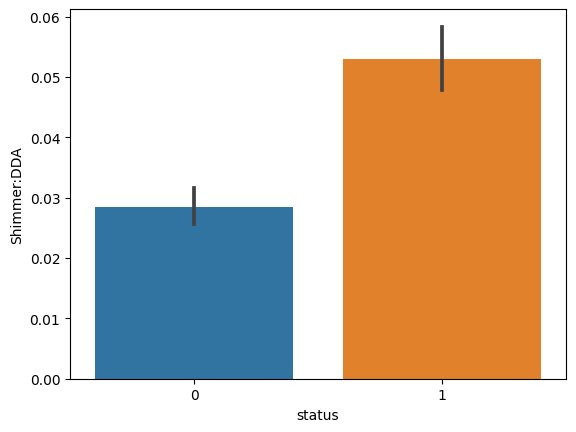

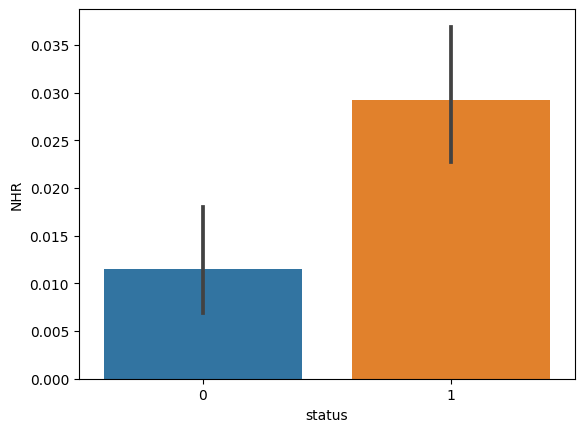

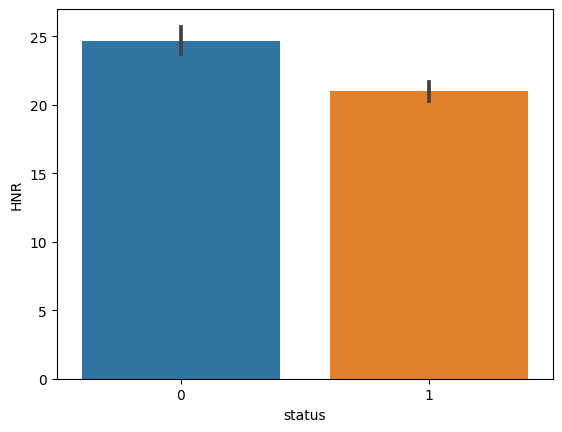

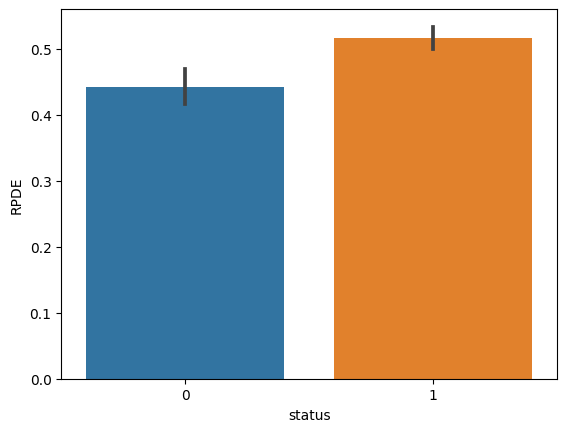

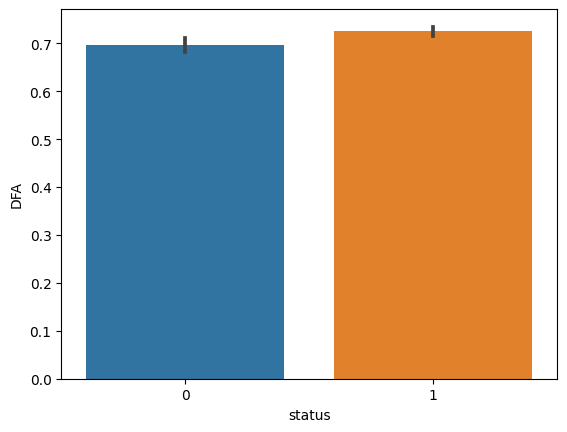

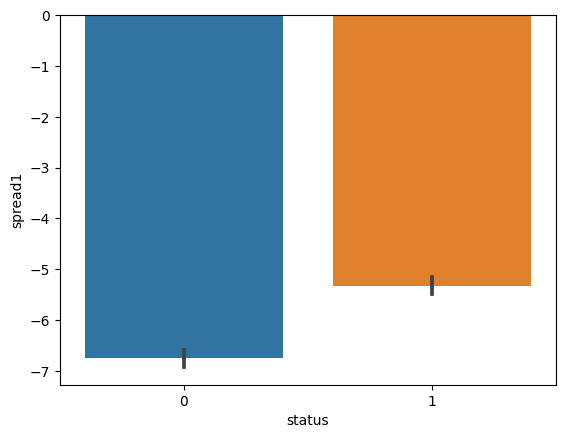

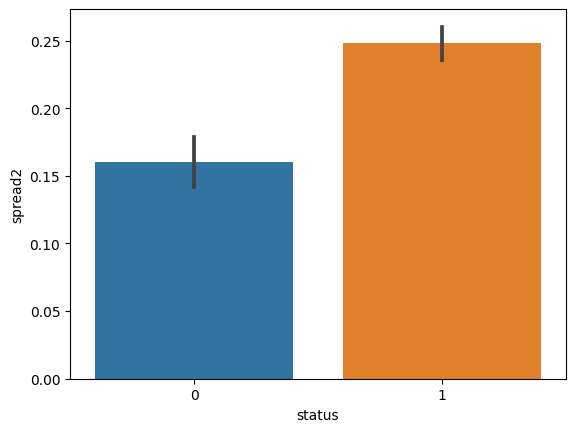

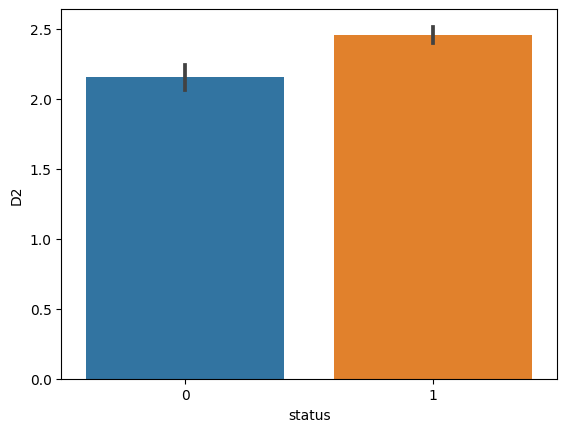

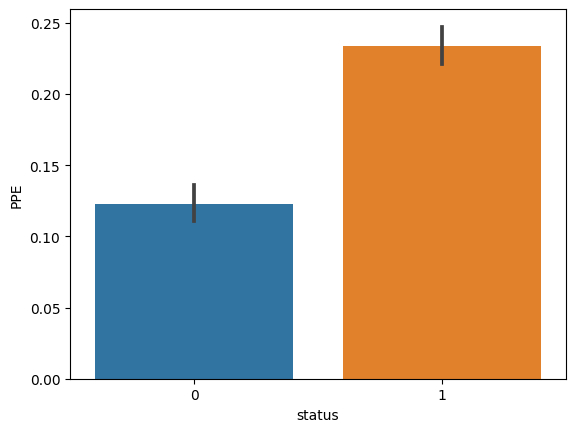

In [13]:
# Analysis of Count Plot Using Status Column
for feature in parkinsons_data.columns:
    if (feature not in ['name','status']):
        sns.barplot(x='status',y=feature,data=parkinsons_data)
        plt.show()

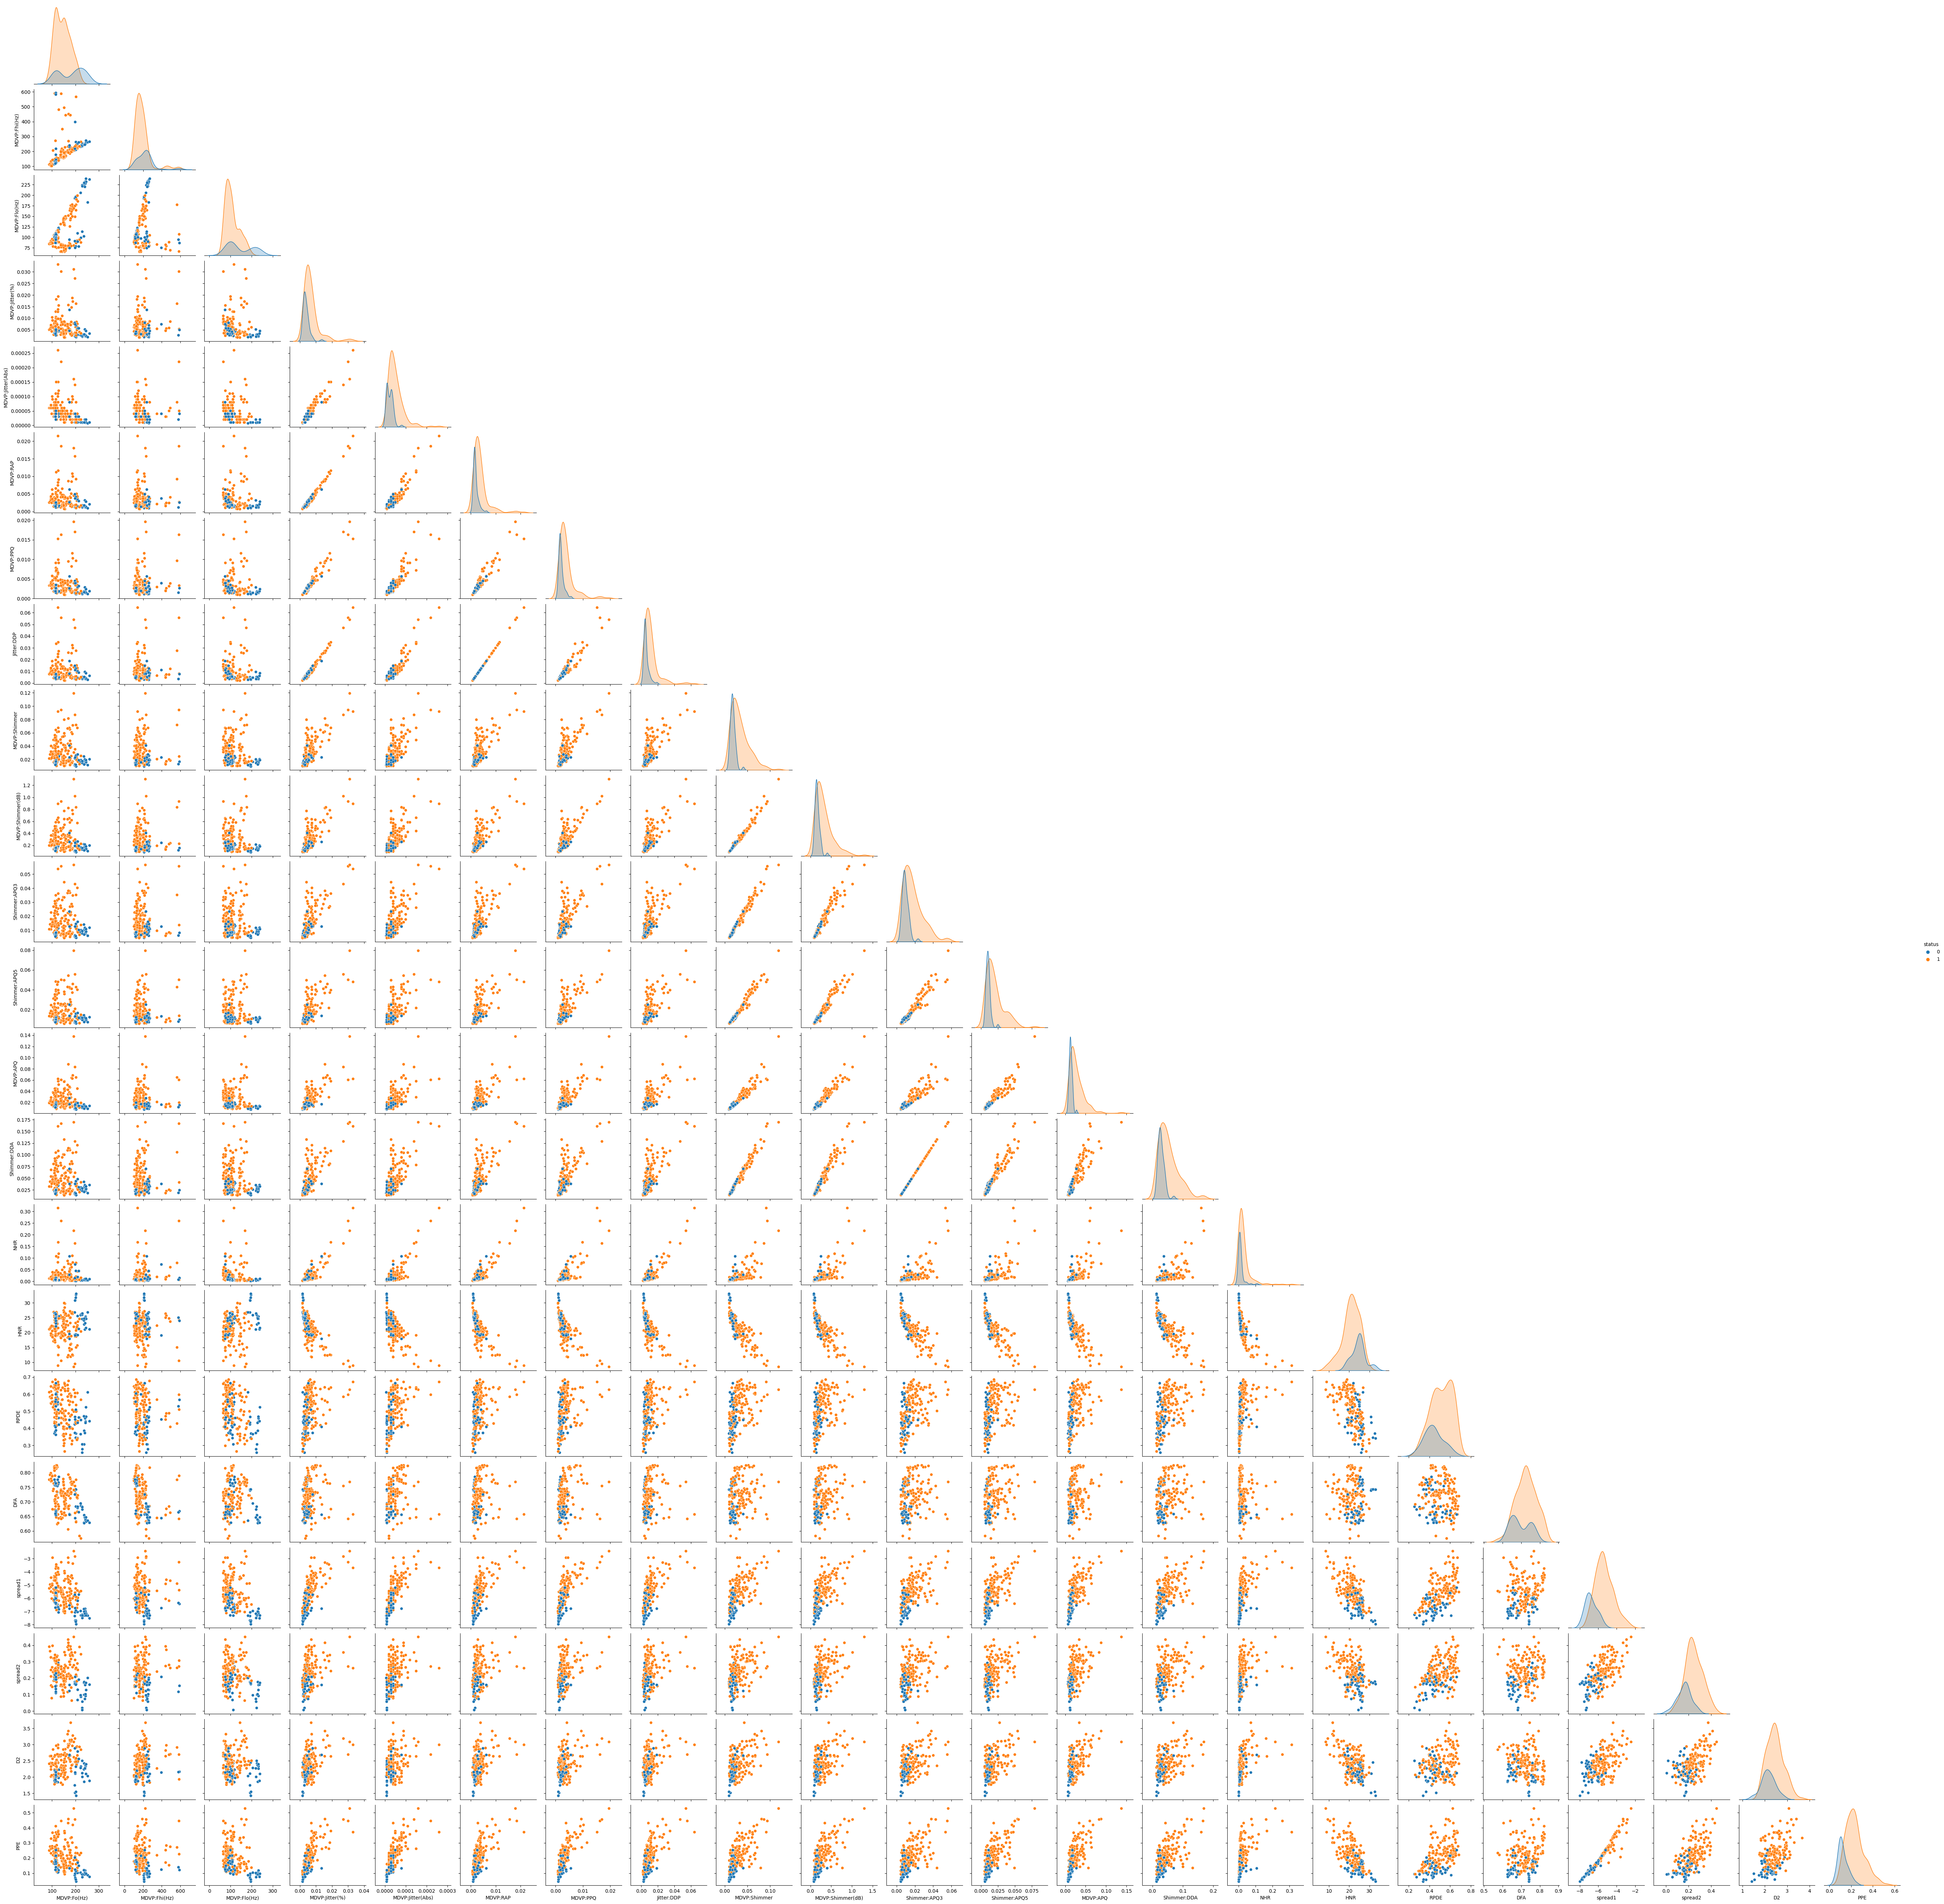

In [14]:
# Pair Plot
sns.pairplot(data=parkinsons_data,hue='status',corner=True)
plt.show()

1  --> Parkinson's Positive

0 --> Healthy

In [15]:
# grouping the data bas3ed on the target variable
parkinsons_data.groupby('status').mean()

<ipython-input-15-fe279e55666c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  parkinsons_data.groupby('status').mean()


MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
status                                                            
0        181.937771    223.636750    145.207292        0.003866   
1        145.180762    188.441463    106.893558        0.006989   

        MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
status                                                                   
0               0.000023  0.001925  0.002056    0.005776      0.017615   
1               0.000051  0.003757  0.003900    0.011273      0.033658   

        MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA       NHR        HNR  \
status                    ...                                               
0               0.162958  ...  0.013305     0.028511  0.011483  24.678750   
1               0.321204  ...  0.027600     0.053027  0.029211  20.974048   

            RPDE       DFA   spread1   spread2        D2       PPE  
status                                                              
0       0.442552  0.695716 -6.759264  0.160292  2.154491  0.123017  
1       0.516816  0.725408 -5.333420  0.248133  2.456058  0.233828  

[2 rows x 22 columns]

Data Pre-Processing

Separating the features & Target

In [16]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [17]:
# Implementing Oversampling for Handling Imbalanced
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
smk = SMOTETomek(random_state=42)
X_res,Y_res=smk.fit_resample(X,Y)

In [18]:
X_res.shape, Y_res.shape

((290, 22), (290,))

In [19]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [20]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


Splitting the data to training data & Test data

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size=0.2, random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (232, 22) (58, 22)


Data Standardization

In [23]:
scaler = StandardScaler()

In [24]:
scaler.fit(X_train)

StandardScaler()

In [25]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [26]:
print(X_train)

[[-0.85195439 -0.76899086 -0.28180957 ...  0.67583744  1.79134599
   2.09618071]
 [ 0.708263    0.05063863  1.19136088 ... -0.3260247  -1.73974192
  -1.21262271]
 [-0.96651038 -0.93181664 -0.35464774 ...  0.43417678 -0.74120858
  -0.35235754]
 ...
 [-1.16494341 -0.92489939 -0.45190558 ... -0.03656462 -0.21578811
   0.70164744]
 [-0.50359389  0.14944708 -0.90694539 ...  0.06459599 -0.26895075
   0.59221239]
 [ 1.66386774  0.80779299  2.03179765 ... -0.41054532 -0.55827519
  -0.9337797 ]]


Model Training

Support Vector Machine Model

In [72]:
model1 = svm.SVC(kernel='linear')

In [73]:
# training the SVM model with training data
model1.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [74]:
# accuracy score on training data
X_train_prediction1 = model1.predict(X_train)
training_data_accuracy1 = accuracy_score(Y_train, X_train_prediction1)

In [75]:
print('Accuracy score of training data : ', training_data_accuracy1)

Accuracy score of training data :  0.9137931034482759


In [76]:
# accuracy score on training data
X_test_prediction1 = model1.predict(X_test)
test_data_accuracy1 = accuracy_score(Y_test, X_test_prediction1)

In [77]:
print('Accuracy score of test data : ', test_data_accuracy1)

Accuracy score of test data :  0.8793103448275862


In [78]:
# Logistic Regreesion
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, Y_train)

LogisticRegression()

In [79]:
# accuracy score on training data
X_train_prediction2 = logisticRegr.predict(X_train)
X_test_prediction2 = model1.predict(X_test)
training_data_accuracy2 = accuracy_score(Y_train, X_train_prediction2)
test_data_accuracy2 = accuracy_score(Y_test, X_test_prediction2)

In [80]:
print('Accuracy score of training data : ', training_data_accuracy2)

Accuracy score of training data :  0.8448275862068966


In [81]:
print('Accuracy score of test data : ', test_data_accuracy2)

Accuracy score of test data :  0.8793103448275862


In [82]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [83]:
# accuracy score on training data
X_train_prediction3 = classifier.predict(X_train)
X_test_prediction3 = model1.predict(X_test)
training_data_accuracy3 = accuracy_score(Y_train, X_train_prediction3)
test_data_accuracy3 = accuracy_score(Y_test, X_test_prediction3)
print('Accuracy score of training data : ', training_data_accuracy3)
print('Accuracy score of test data : ', test_data_accuracy3)

Accuracy score of training data :  1.0
Accuracy score of test data :  0.8793103448275862


In [84]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [85]:
# accuracy score on training data
X_train_prediction4 = neigh.predict(X_train)
X_test_prediction4 = model1.predict(X_test)
training_data_accuracy4 = accuracy_score(Y_train, X_train_prediction4)
test_data_accuracy4 = accuracy_score(Y_test, X_test_prediction4)
print('Accuracy score of training data : ', training_data_accuracy4)
print('Accuracy score of test data : ', test_data_accuracy4)

Accuracy score of training data :  0.9741379310344828
Accuracy score of test data :  0.8793103448275862


In [86]:
from sklearn.naive_bayes import GaussianNB
GNBclf = GaussianNB()
model5 = GNBclf.fit(X_train, Y_train)
X_train_prediction5 = GNBclf.predict(X_train)
X_test_prediction5 = model1.predict(X_test)
training_data_accuracy5 = accuracy_score(Y_train, X_train_prediction5)
test_data_accuracy5 = accuracy_score(Y_test, X_test_prediction5)
print('Accuracy score of training data : ', training_data_accuracy5)
print('Accuracy score of test data : ', test_data_accuracy5)

Accuracy score of training data :  0.8017241379310345
Accuracy score of test data :  0.8793103448275862


Building a Predictive System

In [88]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = neigh.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


[0]
The Person does not have Parkinsons Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [89]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_train, X_train_prediction4))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       116
           1       0.99      0.96      0.97       116

    accuracy                           0.97       232
   macro avg       0.97      0.97      0.97       232
weighted avg       0.97      0.97      0.97       232



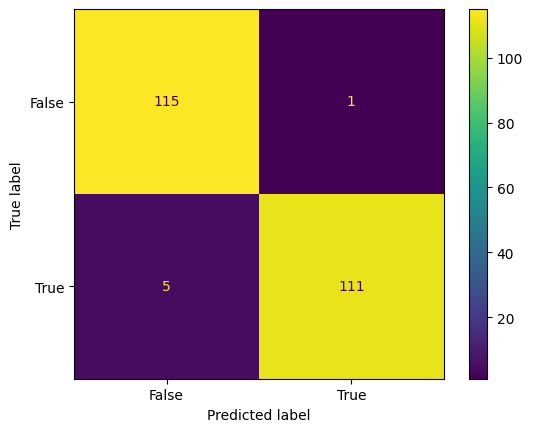

In [90]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(Y_train, X_train_prediction4)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [91]:
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)

      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [92]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

In [95]:
# For KNN 5 Fold Cross Validation
knn_cross_validation = cross_validation(neigh, X_train, Y_train, 5)
print(knn_cross_validation)

{'Training Accuracy scores': array([0.98378378, 0.97297297, 0.96774194, 0.96774194, 0.96774194]), 'Mean Training Accuracy': 97.19965126416739, 'Training Precision scores': array([1.        , 0.98888889, 0.98876404, 0.97802198, 0.98876404]), 'Mean Training Precision': 0.9888877913597014, 'Training Recall scores': array([0.9673913 , 0.95698925, 0.94623656, 0.95698925, 0.94623656]), 'Mean Training Recall': 0.9547685834502104, 'Training F1 scores': array([0.98342541, 0.9726776 , 0.96703297, 0.9673913 , 0.96703297]), 'Mean Training F1 Score': 0.9715120496813633, 'Validation Accuracy scores': array([0.93617021, 0.95744681, 0.97826087, 0.91304348, 0.91304348]), 'Mean Validation Accuracy': 93.95929694727106, 'Validation Precision scores': array([1.        , 0.95652174, 1.        , 0.95238095, 1.        ]), 'Mean Validation Precision': 0.9817805383022774, 'Validation Recall scores': array([0.875     , 0.95652174, 0.95652174, 0.86956522, 0.82608696]), 'Mean Validation Recall': 0.8967391304347826

In [96]:
#For Random Forest
RandomForestCross = cross_validation(classifier, X_train, Y_train, 5)
print(RandomForestCross)

{'Training Accuracy scores': array([1.        , 1.        , 0.99462366, 0.99462366, 0.99462366]), 'Mean Training Accuracy': 99.67741935483872, 'Training Precision scores': array([1.       , 1.       , 0.9893617, 1.       , 1.       ]), 'Mean Training Precision': 0.997872340425532, 'Training Recall scores': array([1.        , 1.        , 1.        , 0.98924731, 0.98924731]), 'Mean Training Recall': 0.9956989247311828, 'Training F1 scores': array([1.        , 1.        , 0.99465241, 0.99459459, 0.99459459]), 'Mean Training F1 Score': 0.9967683191212604, 'Validation Accuracy scores': array([0.95744681, 0.9787234 , 0.93478261, 0.95652174, 0.91304348]), 'Mean Validation Accuracy': 94.81036077705826, 'Validation Precision scores': array([1.        , 0.95833333, 0.91666667, 1.        , 1.        ]), 'Mean Validation Precision': 0.975, 'Validation Recall scores': array([0.91666667, 1.        , 0.95652174, 0.91304348, 0.82608696]), 'Mean Validation Recall': 0.922463768115942, 'Validation F1 sco

In [97]:
#For Logistic Regreesion
logistic_cross = cross_validation(logisticRegr, X_train, Y_train, 5)
print(logistic_cross)

{'Training Accuracy scores': array([0.87027027, 0.92432432, 0.84946237, 0.82795699, 0.84408602]), 'Mean Training Accuracy': 86.32199941877361, 'Training Precision scores': array([0.89534884, 0.93406593, 0.84210526, 0.82105263, 0.84042553]), 'Mean Training Precision': 0.8665996395853945, 'Training Recall scores': array([0.83695652, 0.91397849, 0.86021505, 0.83870968, 0.84946237]), 'Mean Training Recall': 0.8598644226273959, 'Training F1 scores': array([0.86516854, 0.92391304, 0.85106383, 0.82978723, 0.84491979]), 'Mean Training F1 Score': 0.8629704865460294, 'Validation Accuracy scores': array([0.82978723, 0.78723404, 0.82608696, 0.89130435, 0.7826087 ]), 'Mean Validation Accuracy': 82.34042553191489, 'Validation Precision scores': array([0.86363636, 0.7826087 , 0.77777778, 0.90909091, 0.76      ]), 'Mean Validation Precision': 0.818622749231445, 'Validation Recall scores': array([0.79166667, 0.7826087 , 0.91304348, 0.86956522, 0.82608696]), 'Mean Validation Recall': 0.8365942028985506,

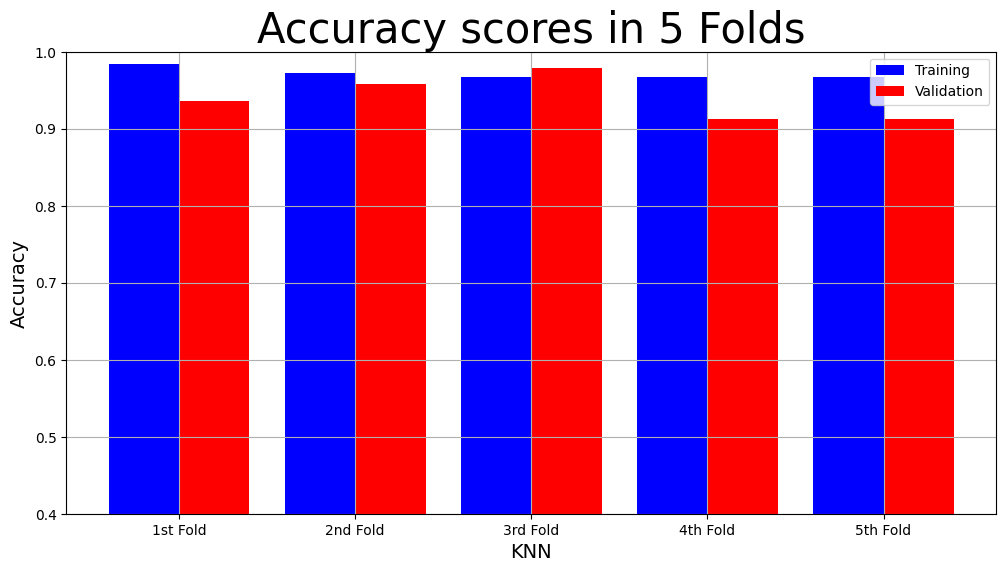

In [98]:
# Plot Accuracy Result
model_name = "KNN"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            knn_cross_validation["Training Accuracy scores"],
            knn_cross_validation["Validation Accuracy scores"])

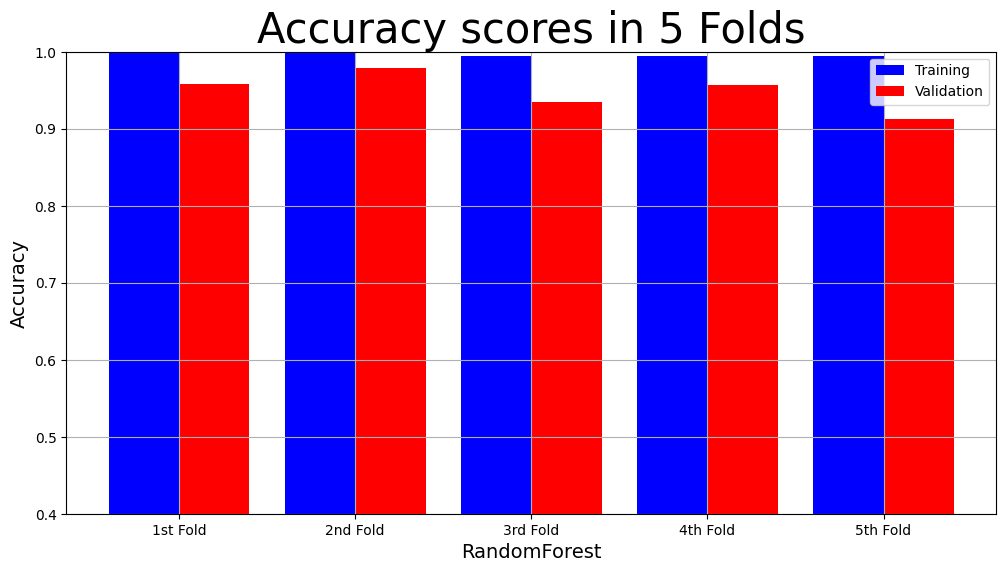

In [99]:
# Plot Accuracy Result
model_name = "RandomForest"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            RandomForestCross["Training Accuracy scores"],
            RandomForestCross["Validation Accuracy scores"])

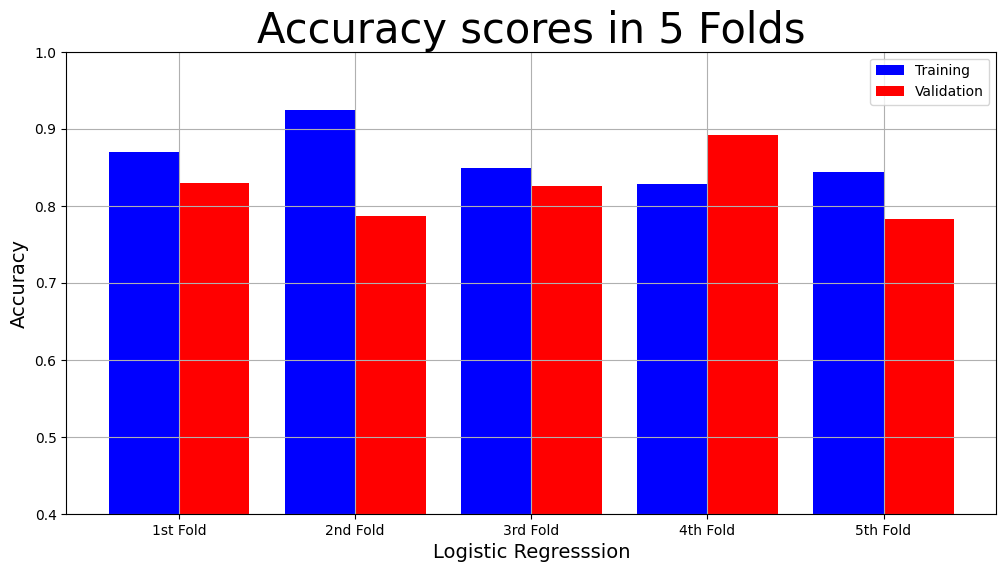

In [100]:
# Plot Accuracy Result
model_name = "Logistic Regresssion"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            logistic_cross["Training Accuracy scores"],
            logistic_cross["Validation Accuracy scores"])